1.Load the data and libraries
2.Data prepartion and preprocessing
3.Data Visulization
4.Data analysis
          1.Uni-variate
          2.Bi-variate
          3.Multi_variate
              Linear Regression
              Decision Tree Regressor



              



1. Dataset Name: Property Price Prediction
2. Author: Sofiya
3. Date: 23/02/2024

Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

*Load* the data


In [ ]:
house=pd.read_csv('/content/HousePrices.csv')

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [ ]:
house.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Exploratory Data Analysis

Univariate Analysis for Continuous Variables

1.*LotFrontage*

> Continuous variable

> skew=3.44

> It is not normally distributed












<ipython-input-54-8ecc9988bf01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['LotFrontage'],kde= True)


<Axes: xlabel='LotFrontage', ylabel='Density'>

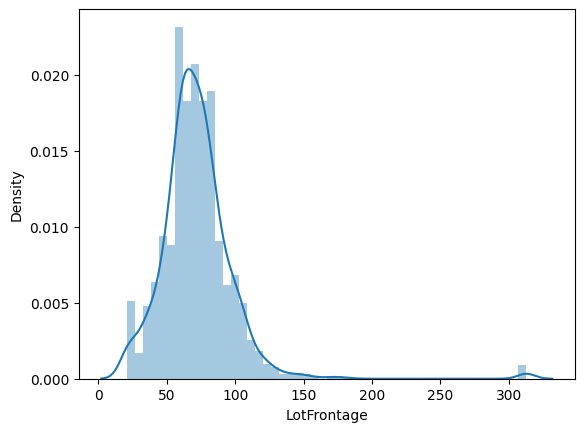

In [ ]:
sns.distplot(house['LotFrontage'],kde= True)

In [ ]:
house.skew()

<ipython-input-55-dfc76565cd4c>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  house.skew()


Id                     -0.033712
Dwell_Type             40.872292
LotFrontage             3.448015
LotArea                11.239413
OverallQual             0.196350
OverallCond             0.649335
YearBuilt              -0.516261
YearRemodAdd           -0.579862
MasVnrArea              2.576900
BsmtFinSF1              1.468890
BsmtFinSF2              4.027937
BsmtUnfSF               0.924212
TotalBsmtSF             1.156452
1stFlrSF                1.247346
2ndFlrSF                0.808616
LowQualFinSF            8.652420
GrLivArea               1.169644
BsmtFullBath            0.619665
BsmtHalfBath            4.169617
FullBath               -0.045613
HalfBath                0.674001
BedroomAbvGr            0.123019
KitchenAbvGr            4.312676
TotRmsAbvGrd            0.721687
Fireplaces              0.625415
GarageYrBlt            -0.700172
GarageCars             -0.373705
GarageArea              0.135391
WoodDeckSF              1.763668
OpenPorchSF             2.257522
EnclosedPo

2.Garage Area


> skew=0.13
>





<ipython-input-56-a60ab39ee1b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['GarageArea'],kde=True)


<Axes: xlabel='GarageArea', ylabel='Density'>

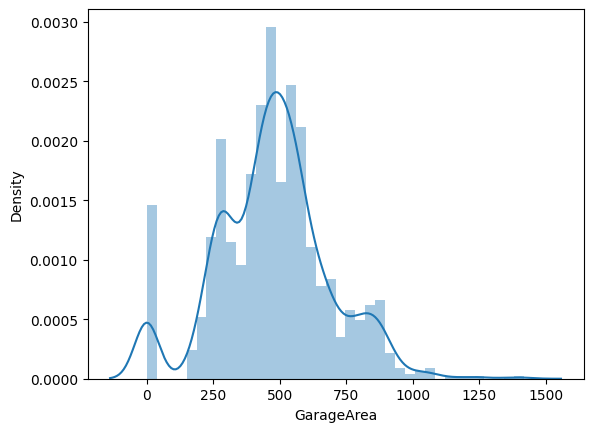

In [ ]:
sns.distplot(house['GarageArea'],kde=True)

3.Overall Quality


> skew=0.19
> mean=6.23 median=6





<ipython-input-57-e42a94a1cedf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['OverallQual'],kde=True)


<Axes: xlabel='OverallQual', ylabel='Density'>

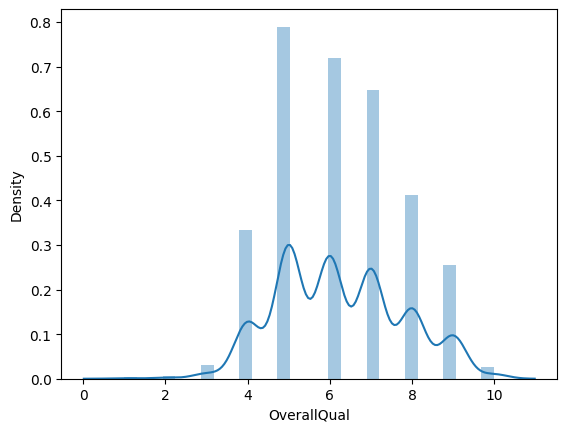

In [ ]:
sns.distplot(house['OverallQual'],kde=True)

4.Basement Finished Square Feet 1


> skew=1.46

> Not normally distributed





<ipython-input-58-012e79b09ab3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['BsmtFinSF1'],kde=True)


<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

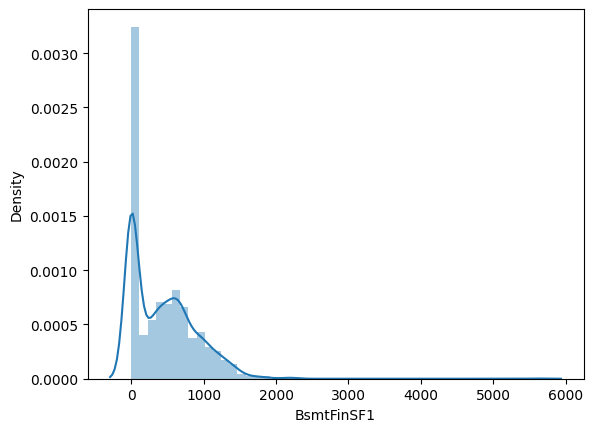

In [ ]:
sns.distplot(house['BsmtFinSF1'],kde=True)

5.PoolArea


> Skew=16.63

> Not Normally Distributed





<ipython-input-59-ae39f212313f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['PoolArea'],kde=True)


<Axes: xlabel='PoolArea', ylabel='Density'>

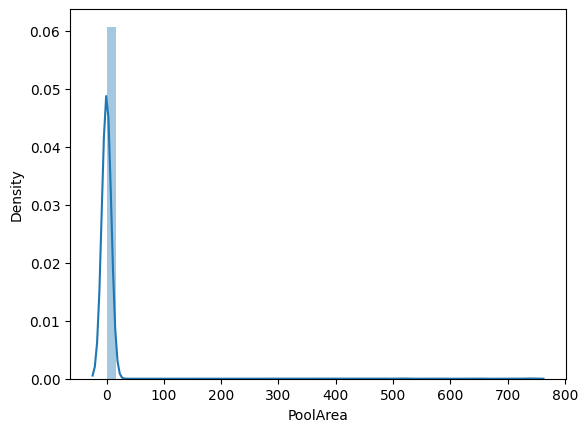

In [ ]:
sns.distplot(house['PoolArea'],kde=True)

Univariate Analysis for Categorical Variables

6.LotConfiguration


> It has 5 categories



<Axes: >

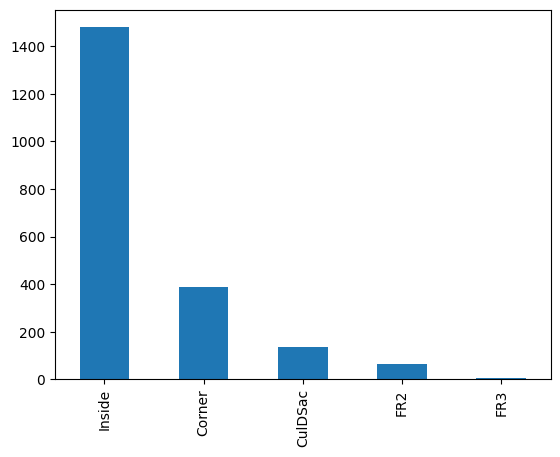

In [ ]:
house['LotConfig'].value_counts().plot(kind='bar')

7.Dwelling type


> It has 5 categories



<Axes: >

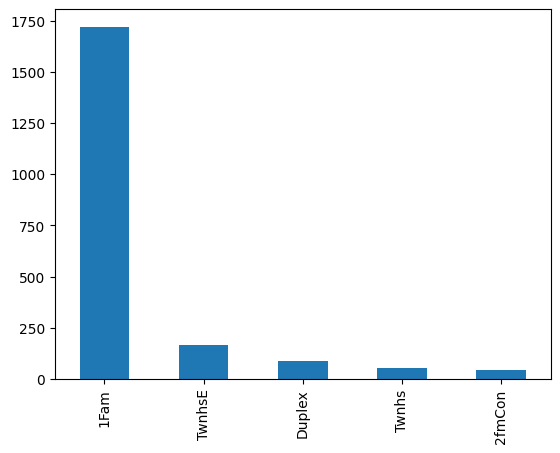

In [ ]:
house['Dwelling_Type'].value_counts().plot(kind='bar')

8.Basement Quality

> It has 4 categories



<Axes: >

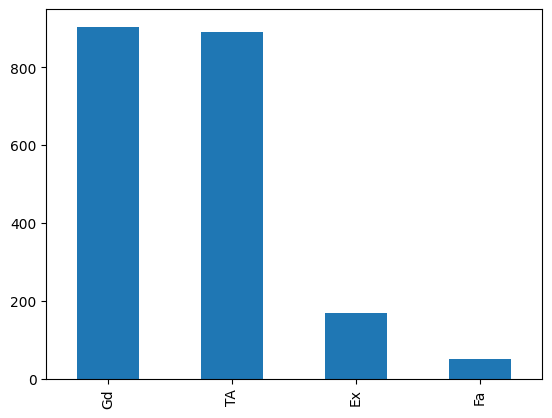

In [ ]:
house['BsmtQual'].value_counts().plot(kind='bar')

9.Garage Type


> It has 6 categories



<Axes: >

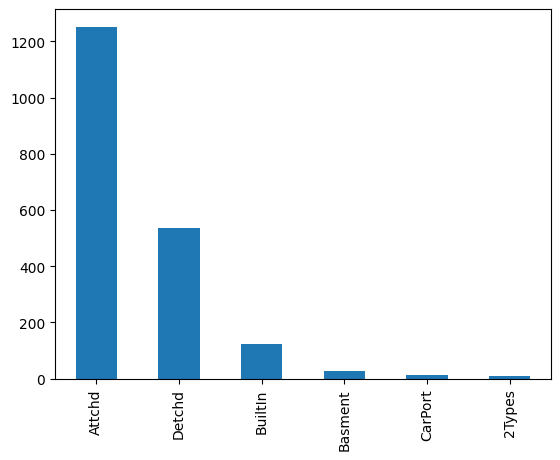

In [ ]:
house['GarageType'].value_counts().plot(kind='bar')

10.Foundation


> It has 6 categories



<Axes: >

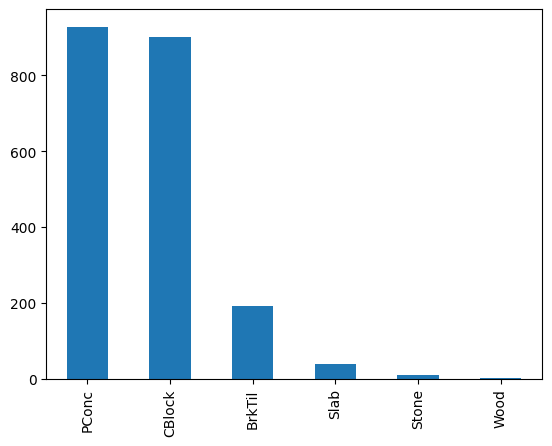

In [ ]:
house['Foundation'].value_counts().plot(kind='bar')

Bivariate Analysis

Correlation

<ipython-input-65-f277e2a07fa5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr(),annot=True)


<Axes: >

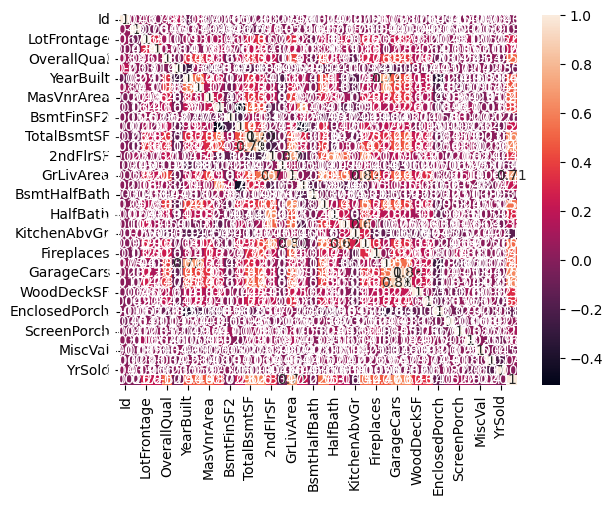

In [ ]:
sns.heatmap(house.corr(),annot=True)

Chi square test

1.Property Shape and RoofMatl

In [ ]:
house['Property_Shape'].value_counts()

Reg    1300
IR1     698
IR2      60
IR3      15
Name: Property_Shape, dtype: int64

In [ ]:
house['RoofMatl'].value_counts()

CompShg    2036
Tar&Grv      17
WdShngl      10
WdShake       6
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [ ]:
pd.crosstab(house['Property_Shape'],house['RoofMatl'])

RoofMatl,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
Property_Shape,,,,,,,,
IR1,0,677,1,1,0,10,3,6
IR2,0,55,0,0,0,4,0,1
IR3,1,14,0,0,0,0,0,0
Reg,0,1290,0,0,1,3,3,3


1.Null Hypothesis:Property Shape and RoofMatl are independent of each other







2.Alternate Hypothesis:Property Shape and RoofMatl are dependent of each other







In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def chi2_sq_test(var1,var2):
  table=pd.crosstab(var1,var2)
  _,p,_,_=chi2_contingency(table)
  if p<=0.05:
    print('Accept the Alternate Hypothesis',round(p,2))
  else:
    print('Accept the Null Hypothesis',round(p,2))
  return table

In [ ]:
chi2_sq_test(house['Property_Shape'],house['RoofMatl'])

Accept the Alternate Hypothesis 0.0


RoofMatl,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
Property_Shape,,,,,,,,
IR1,0,677,1,1,0,10,3,6
IR2,0,55,0,0,0,4,0,1
IR3,1,14,0,0,0,0,0,0
Reg,0,1290,0,0,1,3,3,3


Inference:


*  PropertyShape and RoofMatl are dependent of each other
*  P value=0



2.HouseStyle and Foundation

In [ ]:
chi2_sq_test(house['HouseStyle'],house['Foundation'])

Accept the Alternate Hypothesis 0.0


Foundation,BrkTil,CBlock,PConc,Slab,Stone,Wood
HouseStyle,,,,,,
1.5Fin,69,100,38,4,1,2
1.5Unf,8,4,4,0,0,0
1Story,54,509,442,29,2,0
2.5Fin,5,2,3,0,0,0
2.5Unf,9,5,2,0,0,0
2Story,46,175,403,6,7,1
SFoyer,0,45,8,1,0,0
SLvl,0,61,28,0,0,0


Inference:
House Style and Foundation are dependent of each other



3.Lot Config and Dwelling Type

In [ ]:
chi2_sq_test(house['LotConfig'],house['Dwelling_Type'])

Accept the Alternate Hypothesis 0.0


Dwelling_Type,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
LotConfig,,,,,
Corner,344,7,18,0,17
CulDSac,126,0,2,0,9
FR2,48,0,3,7,7
FR3,2,0,0,0,2
Inside,1199,37,64,48,133


Inference:
LotConfig and Dwelling_type are dependent of each other
p value=0

4.Foundation and GarageType

In [ ]:
chi2_sq_test(house['Foundation'],house['GarageType'])

Accept the Alternate Hypothesis 0.0


GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
Foundation,,,,,,
BrkTil,1,13,4,3,0,146
CBlock,7,532,15,14,10,259
PConc,0,686,7,106,0,108
Slab,0,13,0,1,2,20
Stone,0,6,0,0,0,4
Wood,0,2,1,0,0,0


Inference:
Foundation and Garage Type are dependent of each other
p value=0

5.Exterior1st and Exterior2nd

In [ ]:
chi2_sq_test(house['Exterior1st'],house['Exterior2nd'])

Accept the Alternate Hypothesis 0.0


Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,21,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0
AsphShn,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkFace,1,0,0,34,0,0,5,0,0,0,7,5,1,0,18,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
CemntBd,0,0,0,0,0,84,0,0,0,0,0,0,0,0,1,2
HdBoard,0,1,0,0,0,0,269,2,1,0,36,0,0,0,3,4
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,5,0,297,0,0,0,2,0,2,1


Exterior1st and Exterior2nd are dependent of each other


> p value=0



Data Preparation

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

Handling missing values

In [ ]:
def data_prep(data):
  #Missing values
  data['MasVnrArea']=np.where(data['MasVnrArea'].isna(),data['MasVnrArea'].median(skipna=True),data['MasVnrArea'])
  data['BsmtQual']=np.where(data['BsmtQual'].isna(),data['BsmtQual'].mode(dropna=True)[0],data['BsmtQual'])
  data['BsmtCond']=np.where(data['BsmtCond'].isna(),data['BsmtCond'].mode(dropna=True)[0],data['BsmtCond'])
  data['BsmtExposure']=np.where(data['BsmtExposure'].isna(),data['BsmtExposure'].mode(dropna=True)[0],data['BsmtExposure'])
  data['BsmtFinType1']=np.where(data['BsmtFinType1'].isna(),data['BsmtFinType1'].mode(dropna=True)[0],data['BsmtFinType1'])
  data['BsmtFinType2']=np.where(data['BsmtFinType2'].isna(),data['BsmtFinType2'].mode(dropna=True)[0],data['BsmtFinType2'])
  data['Electrical']=np.where(data['Electrical'].isna(),data['Electrical'].mode(dropna=True)[0],data['Electrical'])
  data['MasVnrType']=np.where(data['MasVnrType'].isna(),data['MasVnrType'].mode(dropna=True)[0],data['MasVnrType'])
  data['Years_of_Built']=2024-data['YearBuilt']
  data['YearRemodAdd']=2024-data['YearRemodAdd']
  data['YrSold']=2024-data['YrSold']
  data['GrLivArea']=2024-data['GrLivArea']
  #Dropping values   Poolqc fence MiscFeatures Id Alley GarageYrBlt LotFrontage FireplaceQu GarageType GarageFinish GarageQual GarageCond
  data.drop(['PoolQC','Fence', 'MiscFeature','Id','Alley','GarageYrBlt','LotFrontage','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond'],inplace = True, axis=1)
  #Datatype conversion
  data['MasVnrArea']=data['MasVnrArea'].astype('int')
  return data


In [ ]:
data_prep(house)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   int64  
 1   Zone_Class           2073 non-null   object 
 2   LotArea              2073 non-null   int64  
 3   Road_Type            2073 non-null   object 
 4   Property_Shape       2073 non-null   object 
 5   LandContour          2073 non-null   object 
 6   Utilities            2073 non-null   object 
 7   LotConfig            2073 non-null   object 
 8   LandSlope            2073 non-null   object 
 9   Neighborhood         2073 non-null   object 
 10  Condition1           2073 non-null   object 
 11  Condition2           2073 non-null   object 
 12  Dwelling_Type        2073 non-null   object 
 13  HouseStyle           2073 non-null   object 
 14  OverallQual          2073 non-null   int64  
 15  OverallCond          2073 non-null   i

One hot encoding

In [ ]:
house_enc=pd.get_dummies(house)

In [ ]:
house_enc.head()


,Dwell_Type,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,21,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,48,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,22,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,54,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,24,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
house_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Columns: 251 entries, Dwell_Type to SaleCondition_Partial
dtypes: float64(1), int64(35), uint8(215)
memory usage: 1018.4 KB




> Dividing into Y and X



In [ ]:
y=house_enc['Property_Sale_Price']
x=house_enc.drop('Property_Sale_Price',axis=1)

In [ ]:
print(y.shape)
print(x.shape)

(2073,)
(2073, 250)




> Train Test Split



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=32)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1658, 250)
(1658,)
(415, 250)
(415,)


Multi-Variate Model

In [ ]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)

5764170996273015.0


In [ ]:
print(lr.coef_)

[-1.88738928e+00  3.93369829e-01  9.32064945e+02  2.48407868e+03
  4.37580297e+11 -7.42260703e+01  2.69670678e+01  2.98227383e+12
  2.98227383e+12  2.98227383e+12 -2.98227383e+12 -3.28550664e+12
 -3.28550664e+12 -3.28550664e+12 -3.28550664e+12 -7.66637954e+02
 -3.54403665e+03  5.03903083e+03  2.22914580e+03 -3.59275578e+03
 -1.93344937e+04  1.68604368e+03  3.92305852e+03  2.89390881e+03
  1.74767163e+01  1.00534180e+01  1.24175657e+01 -1.04346079e+01
  1.65254846e+01  4.13969073e+01  1.08764023e+02  3.87963901e-01
 -6.12902030e+02 -2.39798828e+02  4.37580297e+11  4.56752780e+09
  4.56755112e+09  4.56755621e+09  4.56755698e+09  4.56755455e+09
  5.64248445e+08  5.64285682e+08  3.65371028e+08  3.65379190e+08
  3.65379043e+08  3.65374145e+08 -6.98640512e+08 -6.98631181e+08
 -6.98647213e+08 -6.98636246e+08 -1.47491078e+08 -1.47533384e+08
  9.27689178e+09  9.27690075e+09  9.27688256e+09  9.27686874e+09
  9.27688951e+09 -3.70799031e+09 -3.70798717e+09 -3.70801281e+09
 -5.82829459e+08 -5.82825

In [ ]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.2f}")  # Format to 2 decimal places

Dwell_Type: -1.89
LotArea: 0.39
OverallQual: 932.06
OverallCond: 2484.08
YearBuilt: 437580296809.25
YearRemodAdd: -74.23
MasVnrArea: 26.97
BsmtFinSF1: 2982273828330.36
BsmtFinSF2: 2982273828315.59
BsmtUnfSF: 2982273828310.72
TotalBsmtSF: -2982273828293.91
1stFlrSF: -3285506639201.89
2ndFlrSF: -3285506639191.95
LowQualFinSF: -3285506639230.79
GrLivArea: -3285506639253.65
BsmtFullBath: -766.64
BsmtHalfBath: -3544.04
FullBath: 5039.03
HalfBath: 2229.15
BedroomAbvGr: -3592.76
KitchenAbvGr: -19334.49
TotRmsAbvGrd: 1686.04
Fireplaces: 3923.06
GarageCars: 2893.91
GarageArea: 17.48
WoodDeckSF: 10.05
OpenPorchSF: 12.42
EnclosedPorch: -10.43
3SsnPorch: 16.53
ScreenPorch: 41.40
PoolArea: 108.76
MiscVal: 0.39
MoSold: -612.90
YrSold: -239.80
Years_of_Built: 437580296760.43
Zone_Class_C (all): 4567527802.71
Zone_Class_FV: 4567551124.66
Zone_Class_RH: 4567556214.52
Zone_Class_RL: 4567556980.08
Zone_Class_RM: 4567554548.58
Road_Type_Grvl: 564248444.81
Road_Type_Pave: 564285682.49
Property_Shape_IR1: 3

In [ ]:
y_hat_train=lr.predict(x_train)
y_hat_test=lr.predict(x_test)

In [ ]:
y_train #actual

1859    125500
1389    131000
910     154300
444     210000
1616    120000
         ...  
997     185000
510     164900
252     173000
1334    125000
1579    320000
Name: Property_Sale_Price, Length: 1658, dtype: int64

In [ ]:
y_hat_train #predicted

array([117439., 129839., 169360., ..., 176885., 122450., 329349.])

In [ ]:
rms_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("The Rms for the model is",round(rms_train,2))

The Rms for the model is 21707.51


In [ ]:
rms_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("The Rms for the model is",round(rms_test,2))

The Rms for the model is 141977644.19


In [ ]:
r2_score_train=(r2_score(y_train,y_hat_train))
print("The R2_score for the model is",round(r2_score_train,2))

The R2_score for the model is 0.92




1.  The R2 value for train is 0.92
2.  It is close to 1 hence train data is good   



In [ ]:
r2_score_test=(r2_score(y_test,y_hat_test))
print("The R2_score for the model is",round(r2_score_test,2))

The R2_score for the model is -3286600.75




1.  The R2 score for test = -3286600.75
2.   It is bad so let us perform feature selection and do linear regression later



Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
#fit the model
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))


r2 score of the model for train data is: 1.0






1. The r2 score train = 1.0

2.  It is exactly 1 hence our train data is very good









In [ ]:
print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))


r2 score of the model for test data is: 0.8




1.  The r2 score for test data=0.8
2.  It is good ( the difference between train and test =0.2)





In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


The rmse value for train is 0

In [ ]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))


34596.47


The rmse value for test is 34596.47

Text(0.5, 1.0, 'tree for the prediction columns')

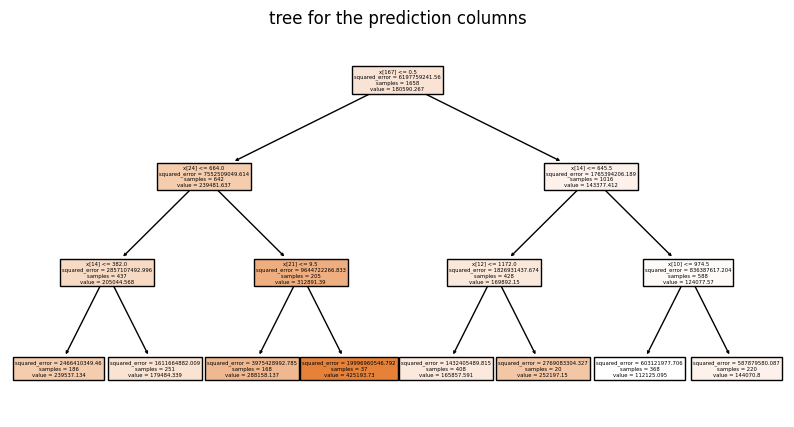

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")


Feature Selection

In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)


,col_name
ExterQual_TA,0.353598
GarageArea,0.163006
GrLivArea,0.106468
1stFlrSF,0.063063
TotRmsAbvGrd,0.057525
...,...
Condition1_RRAn,0.000000
Condition1_RRNn,0.000000
Condition2_Artery,0.000000
Condition2_Feedr,0.000000


In [ ]:
# Assuming dtree.feature_importances_ is a list or array containing feature importances
# and x.columns is a list of column names
feature_importances = dtree.feature_importances_
columns = x.columns

# Create a DataFrame with feature importances and column names
feature_importance_df = pd.DataFrame({'col_name': feature_importances}, index=columns)

# Filter out columns with feature importance of 0
zero_importance_df = feature_importance_df[feature_importance_df['col_name'] == 0]

# Display the columns with feature importance of 0
print(zero_importance_df)


                       col_name
3SsnPorch                   0.0
MiscVal                     0.0
Zone_Class_RH               0.0
Road_Type_Grvl              0.0
Road_Type_Pave              0.0
...                         ...
SaleType_ConLI              0.0
SaleType_ConLw              0.0
SaleType_New                0.0
SaleCondition_AdjLand       0.0
SaleCondition_Alloca        0.0

[82 rows x 1 columns]


In [ ]:
zero_importance_df

,col_name
3SsnPorch,0.0
MiscVal,0.0
Zone_Class_RH,0.0
Road_Type_Grvl,0.0
Road_Type_Pave,0.0
...,...
SaleType_ConLI,0.0
SaleType_ConLw,0.0
SaleType_New,0.0
SaleCondition_AdjLand,0.0


Linear Regression after Feature Selection

In [ ]:
#Dropping some features
house_enc.drop(['3SsnPorch',
'MiscVal',
'Zone_Class_RH',
'Road_Type_Grvl',
'Road_Type_Pave',
'Property_Shape_IR3',
'LandContour_Bnk'	,
'Utilities_AllPub',
'Utilities_NoSeWa',
'LotConfig_FR3'	,
'LandSlope_Sev'	,
'Neighborhood_Blueste',
'Neighborhood_BrDale'	,
'Neighborhood_MeadowV',
'Condition1_PosA'	,
'Condition1_PosN'	,
'Condition1_RRAe'	,
'Condition1_RRAn'	,
'Condition1_RRNn'	,
'Condition2_Artery',
'Condition2_Feedr'	,
'Condition2_Norm'	,
'Condition2_PosA'	,
'Condition2_PosN'	,
'Condition2_RRAe',
'Condition2_RRAn'	,
'Condition2_RRNn'	,
'Dwelling_Type_Duplex',
'HouseStyle_2.5Fin',
'HouseStyle_SFoyer'	,
'RoofStyle_Flat'	,
'RoofStyle_Mansard',
'RoofStyle_Shed'	,
'RoofMatl_Membran',
'RoofMatl_Metal'	,
'RoofMatl_Roll'	,
'RoofMatl_Tar&Grv' ,
'RoofMatl_WdShake',
'RoofMatl_WdShngl',
'Exterior1st_AsbShng',
'Exterior1st_AsphShn'	,
'Exterior1st_BrkComm'	,
'Exterior1st_CBlock'	,
'Exterior1st_Stucco'	,
'Exterior2nd_AsphShn'	,
'Exterior2nd_CBlock'	,
'Exterior2nd_Other'	,
'Exterior2nd_Stone'	,
'Exterior2nd_Stucco',
'ExterCond_Ex',
'ExterCond_Fa',
'ExterCond_Po'	,
'Foundation_Slab',
'Foundation_Stone',
'Foundation_Wood'	,
'BsmtQual_Fa'	,
'BsmtCond_Gd'	,
'BsmtCond_Po'	,
'BsmtFinType2_ALQ',
'BsmtFinType2_GLQ',
'BsmtFinType2_Unf',
'Heating_Floor'	,
'Heating_GasW'	,
'Heating_OthW'	,
'Heating_Wall'	,
'HeatingQC_Fa'	,
'HeatingQC_Po'	,
'Electrical_Mix',
'Functional_Maj1'	,
'Functional_Maj2'	,
'Functional_Min1'	,
'Functional_Mod'	,
'Functional_Sev'	,
'SaleType_COD'	,
'SaleType_CWD',
'SaleType_Con',
'SaleType_ConLD',
'SaleType_ConLI',
'SaleType_ConLw',
'SaleType_New'	,
'SaleCondition_AdjLand'	,
'SaleCondition_Alloca'],inplace = True, axis=1)

In [ ]:
house_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Columns: 169 entries, Dwell_Type to SaleCondition_Partial
dtypes: float64(1), int64(33), uint8(135)
memory usage: 824.1 KB


Dividing x and y

In [ ]:
y=house_enc['Property_Sale_Price']
x=house_enc.drop('Property_Sale_Price',axis=1)

In [ ]:
print(y.shape)
print(x.shape)

(2073,)
(2073, 168)


Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1658, 168)
(1658,)
(415, 168)
(415,)


In [ ]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)

38824.38596043177


In [ ]:
print(lr.coef_)

[-1.85714651e+00  3.36903686e-01  1.04292075e+03  2.31595311e+03
  1.48987858e+01 -6.98228209e+01  2.43506301e+01  1.29390886e+01
  1.19957425e+01 -1.77081990e+00  2.31639960e+01  2.19138658e+01
  2.69603821e+01 -2.61397186e+01 -2.27345695e+01  6.20509254e+02
 -9.29922940e+02  4.52674198e+03  3.49132371e+03 -3.39227553e+03
 -1.32283443e+04  2.97172492e+03  3.77667643e+03  4.49900541e+03
  8.62167457e+00  1.79041253e+01  7.05497131e+00  6.37464455e+00
  1.97814092e+01  1.51635610e+01 -2.57224431e+02 -1.67274869e+02
 -1.48987904e+01 -3.01668950e+04 -7.85792308e+03 -7.29397047e+03
 -6.16465020e+03 -1.52528502e+04 -7.64410026e+03 -1.39034323e+04
  1.43799682e+04  2.37615466e+03  1.06270420e+04  6.86241578e+03
  1.36895915e+04 -1.68719827e+03  5.97902853e+03  2.53789366e+04
  2.72000138e+04  1.29916012e+03 -9.68386306e+03 -7.40943609e+03
 -7.17814111e+03  1.46027278e+04 -2.61036204e+04 -7.68390858e+03
 -1.83721928e+04 -1.66585466e+04 -1.47497195e+04  2.01003506e+04
 -6.49304190e+03  3.27751

In [ ]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.2f}")  # Format to 2 decimal places

Dwell_Type: -1.86
LotArea: 0.34
OverallQual: 1042.92
OverallCond: 2315.95
YearBuilt: 14.90
YearRemodAdd: -69.82
MasVnrArea: 24.35
BsmtFinSF1: 12.94
BsmtFinSF2: 12.00
BsmtUnfSF: -1.77
TotalBsmtSF: 23.16
1stFlrSF: 21.91
2ndFlrSF: 26.96
LowQualFinSF: -26.14
GrLivArea: -22.73
BsmtFullBath: 620.51
BsmtHalfBath: -929.92
FullBath: 4526.74
HalfBath: 3491.32
BedroomAbvGr: -3392.28
KitchenAbvGr: -13228.34
TotRmsAbvGrd: 2971.72
Fireplaces: 3776.68
GarageCars: 4499.01
GarageArea: 8.62
WoodDeckSF: 17.90
OpenPorchSF: 7.05
EnclosedPorch: 6.37
ScreenPorch: 19.78
PoolArea: 15.16
MoSold: -257.22
YrSold: -167.27
Years_of_Built: -14.90
Zone_Class_C (all): -30166.89
Zone_Class_FV: -7857.92
Zone_Class_RL: -7293.97
Zone_Class_RM: -6164.65
Property_Shape_IR1: -15252.85
Property_Shape_IR2: -7644.10
Property_Shape_Reg: -13903.43
LandContour_HLS: 14379.97
LandContour_Low: 2376.15
LandContour_Lvl: 10627.04
LotConfig_Corner: 6862.42
LotConfig_CulDSac: 13689.59
LotConfig_FR2: -1687.20
LotConfig_Inside: 5979.03
Land

In [ ]:
y_hat_train=lr.predict(x_train)
y_hat_test=lr.predict(x_test)

In [ ]:
y_train #actual

1743    187500
1640    144000
2028    153000
1432     64500
1586    144000
         ...  
1638    136500
1095    176432
1130    135000
1294    115000
860     189950
Name: Property_Sale_Price, Length: 1658, dtype: int64

In [ ]:
y_hat_train #predicted

array([202933.80629822, 131055.07531733, 148967.77998255, ...,
       165349.18145817, 111994.89967036, 177680.41586841])

In [ ]:
rms_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("The Rms for the model is",round(rms_train,2))

The Rms for the model is 22808.22


In [ ]:
rms_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("The Rms for the model is",round(rms_test,2))

The Rms for the model is 26300.25


In [ ]:
r2_score_train=(r2_score(y_train,y_hat_train))
print("The R2_score for the model is",round(r2_score_train,2))

The R2_score for the model is 0.92




1. The R2 score for the train data=0.92
2. It is close to 1  



In [ ]:
r2_score_test=(r2_score(y_test,y_hat_test))
print("The R2_score for the model is",round(r2_score_test,2))

The R2_score for the model is 0.88




1. The R2 score for test=0.88
2.  We can see a drastic difference before and after feature selection , now the r2_score has improved






> Conclusion

>  Linear regression

> r2_score for train=0.92 (close to 1) Good

> r2_score for test=0.88







Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
#fit the model
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))


r2 score of the model for train data is: 1.0


The r2 score of the model for train data is 1.0


In [ ]:
print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))


r2 score of the model for test data is: 0.8




1.  The r2 score of the model for test data is: 0.8

2.  In dtree we are not able to see big difference in the values before and after feature selection for the r2_score of train and test



In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


In [ ]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))

33896.87


Text(0.5, 1.0, 'tree for the prediction columns')

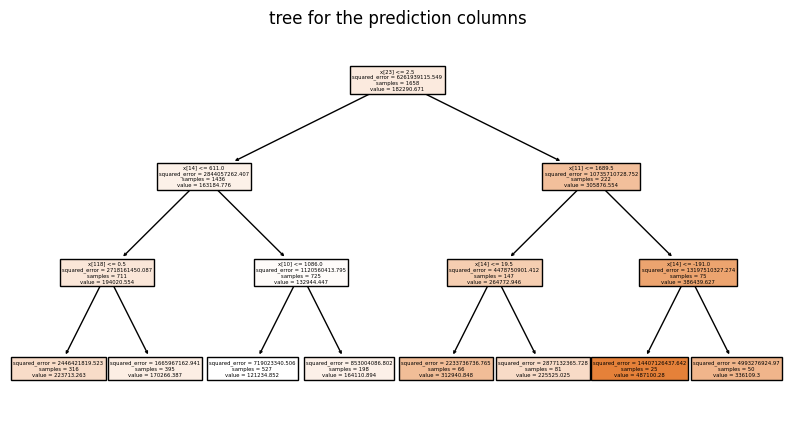

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")




> Conclusion


> Decision Tree



> The r2 score for train=1(exactly 1)

> The r2 score for test=0.8  (Difference between train and test = 0.2)









> Final Inference


>  1.Linear regression

> r2_score for train=0.92 (close to 1) Good

> r2_score for test=0.88 (difference between train and test = 0.04)

  
>2.Decision Tree

> The r2 score for train=1(exactly 1)

> The r2 score for test=0.8  (Difference between train and test = 0.2)





